In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
matches = pd.read_csv("D:\R\ipl\matches.csv")
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [4]:
matches.drop(columns=["umpire1","umpire2","umpire3"],inplace=True)

In [5]:
teams = matches['team1'].unique()
teams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [6]:
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
        ['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace=True)

In [7]:
print("Total matches : ",matches.shape[0])

print("\nTeams : ",matches["team1"].unique())
print("Total Teams : ",matches["team1"].nunique())

print("\nCities : ",matches["city"].unique())
print("Total Cities : ",matches["city"].nunique())


Total matches :  636

Teams :  ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']
Total Teams :  13

Cities :  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
Total Cities :  30


In [8]:
print("Most PoM :",(matches["player_of_match"].value_counts()).idxmax())
print("\nPoM :\n",(matches["player_of_match"].value_counts().head(7)))

trace1 = go.Histogram(
    x=matches["player_of_match"],
    opacity=0.75
)
data = [trace1]
fig = go.Figure(data=data)

py.iplot(fig)

Most PoM : CH Gayle

PoM :
 CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
Name: player_of_match, dtype: int64


In [9]:
print("Most wins :",(matches["winner"].value_counts()).idxmax())
matches_won_byteams = matches["winner"].value_counts()
print("\nWins : \n",(matches_won_byteams.head()))


Most wins : MI

Wins : 
 MI      92
CSK     79
KKR     77
RCB     73
KXIP    70
Name: winner, dtype: int64


In [10]:
matches_played_byteams = pd.concat([matches["team1"],matches["team2"]]).value_counts()

percent_won_byteams = ((matches_won_byteams / matches_played_byteams ) * 100).sort_values(ascending=False)

percent_won_byteams.head(5)

CSK    60.305344
MI     58.598726
SRH    55.263158
RR     53.389831
KKR    52.027027
dtype: float64

In [11]:
trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams.values,
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_won_byteams.values,
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Matches won by Teams'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [12]:
#percent_won_byteams.set_index('Teams',inplace=True)
percent_won_byteams=pd.Series.to_frame(percent_won_byteams)


In [13]:
#percent_won_byteams.reset_index(inplace=True)
percent_won_byteams.columns=["Winning_Percentage"]

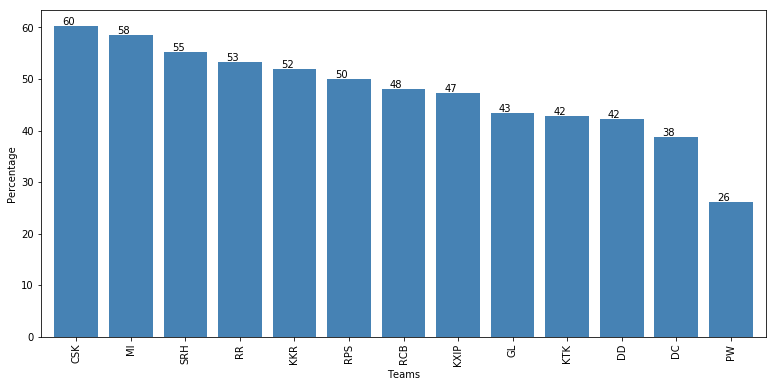

In [14]:
plt.subplots(figsize=(13,6))
#the code used is very basic but gets the job done easily
ax = percent_won_byteams["Winning_Percentage"].plot.bar(width=.8, color='Steelblue')  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('Teams') 
ax.set_ylabel('Percentage')
i=0
for p in ax.patches:
    ax.annotate(int(percent_won_byteams.values[i]),(p.get_x()+0.15, p.get_height()+0.25))
    i += 1
plt.show()

In [15]:
#total matches played vs Toss win
toss_won_byteams=matches["toss_winner"].value_counts()
toss_won_byteams
trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams.values,
    name='Total Matches'
)
trace2 = go.Bar(
    x=toss_won_byteams.index,
    y=toss_won_byteams.values,
    name='Toss Won'
)

data = [trace1, trace2]
layout ={'barmode':'gruped',
    'xaxis': {'title': 'Teams','tickangle':'-45'},
    'yaxis': {'title': 'Number of Matches'},
    'title': 'Toss Won by Teams'
}

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked-bar')

In [16]:
# won the toss and won the match
toss_matches_won = (matches.query("winner == toss_winner")["winner"].value_counts() / toss_won_byteams ) * 100

trace1 = go.Bar(
    x=toss_matches_won.index,
    y=toss_matches_won.values,
    name='Toss and Matches won',
    text=toss_matches_won.values.astype(int),
    textposition = 'auto'
)
data = [trace1]
layout = {
  'xaxis': {'title': 'Teams'},
  'yaxis': {'title': 'Percentage Wins'},
  'title': 'Win percentage of Teams when they won the toss'
};

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='stacked-bar')

In [17]:
home_matches_played = matches["team1"].value_counts()
away_matches_played = matches["team2"].value_counts()
home_matches_won=matches.query("team1 == winner")["team1"].value_counts()
away_matches_won=matches.query("team2 == winner")["team2"].value_counts()

trace1 = go.Bar(
    x=home_matches_played.index,
    y=home_matches_played.values,
    name='Played'
)
trace2 = go.Bar(
    x=home_matches_won.index,
    y=home_matches_won.values,
    name='Won'
)


data = [trace1, trace2]
layout ={'barmode':'overlay',
    'xaxis': {'title': 'Teams','tickangle':'-45'},
    'yaxis': {'title': 'Number of Matches'},
    'title': 'Home Record of Teams'
}

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)
print("Top 5 teams with highest percentage of wins at home venue")
((home_matches_won / home_matches_played ) * 100).sort_values(ascending=False).head(5)

Top 5 teams with highest percentage of wins at home venue


CSK    58.441558
MI     57.317073
SRH    50.000000
RR     46.296296
RCB    42.857143
Name: team1, dtype: float64

In [18]:

trace1 = go.Bar(
    x=away_matches_played.index,
    y=away_matches_played.values,
    name='Played'
)

trace2 = go.Bar(
    x=away_matches_won.index,
    y=away_matches_won.values,
    name='Won'
)

data = [trace1, trace2]
layout ={'barmode':'overlay',
    'xaxis': {'title': 'Teams','tickangle':'-45'},
    'yaxis': {'title': 'Number of Matches'},
    'title': 'Away Record of Teams'
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
print("Top 5 teams with highest percentage of wins away from home")
((away_matches_won / away_matches_played ) * 100).sort_values(ascending=False).head(5)

Top 5 teams with highest percentage of wins away from home


GL     75.000000
RPS    66.666667
SRH    63.333333
CSK    62.962963
MI     60.000000
Name: team2, dtype: float64

In [19]:
trace1 = go.Histogram(
    y=matches["season"],
    opacity=0.75
)
data = [trace1]
layout = go.Layout(
    title='Matches per Season',
    yaxis=dict(title='Season'),
    xaxis=dict(title='Number of Matches'),bargap=0.1,
    bargroupgap=0.1
)
fig = go.Figure(data=data,layout=layout)

py.iplot(fig)

In [20]:
CSK=(matches.query("team1 == 'CSK' or team2 == 'CSK'"))
trace1 = go.Histogram(
    x=CSK['season'],
    opacity=1
)

trace2 = go.Histogram(
    x=CSK.loc[CSK['winner'] == 'CSK']['season'],
    opacity=0.75
)
data = [trace1,trace2]
layout = go.Layout(
    title='Matches Won By CSK per Season',
    xaxis=dict(title='Season'),
    yaxis=dict(title='Number of Matches'),
    bargap=0.1,
    barmode='overlay'
)
fig = go.Figure(data=data,layout=layout)

py.iplot(fig)

In [21]:
MI_p = (matches.query("winner=='MI'").groupby('season')['id'].count() / matches.query("team1 == 'MI' or team2 == 'MI'").groupby('season')['id'].count())*100
CSK_p = (matches.query("winner=='CSK'").groupby('season')['id'].count() / matches.query("team1 == 'CSK' or team2 == 'CSK'").groupby('season')['id'].count())*100
RCB_p = (matches.query("winner=='RCB'").groupby('season')['id'].count() / matches.query("team1 == 'RCB' or team2 == 'RCB'").groupby('season')['id'].count())*100
KKR_p =(matches.query("winner=='KKR'").groupby('season')['id'].count() / matches.query("team1 == 'KKR' or team2 == 'KKR'").groupby('season')['id'].count())*100
ses=matches["season"].sort_values().unique()

trace_mi = go.Scatter(
    x = ses,
    y = MI_p,
    name='MI'
)
trace_csk = go.Scatter(
    x = ses,
    y = CSK_p,
    name='CSK'
)
trace_rcb = go.Scatter(
    x = ses,
    y = RCB_p,
    name='RCB'
)
trace_kkr = go.Scatter(
    x = ses,
    y = KKR_p,
    name='KKR'
)

layout = go.Layout(
    title='Teams Win Percentage',
    xaxis=dict(title='Season'),
    yaxis=dict(title='Win Percentage'),
    
)
data = [trace_mi,trace_csk,trace_rcb,trace_kkr]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)


In [22]:
trace = go.Scatter(
    x = CSK["season"].unique(),
    y = CSK_p
)
layout = go.Layout(
    title='CSK Win Percentage',
    xaxis=dict(title='Season'),
    yaxis=dict(title='Win Percentage'),
)
data = [trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)


In [23]:
season_year=2014 #Change season year here
res=np.zeros(CSK[CSK["season"]==season_year]["winner"].count(),dtype='str')
j=0
for i in CSK[CSK["season"]==season_year]["winner"]:
    if i == 'CSK':
        res[j]='won'
    elif i != 'CSK':
        res[j]='lose'
    else:
        res[j]='NA'
    j+=1
#print(res)
#print(a["date"])
trace = go.Scatter(
    x = (CSK[CSK["season"]==season_year]["date"]),
    y = res,
    #mode = 'markers'
    
    marker = dict(size = 10, color = 'rgba(25, 182, 193, .9)',line = dict(width = 2))
)
layout = go.Layout(
    title='CSK  Season '+str(season_year),
    xaxis=dict(title='Matches'),
    yaxis=dict(title='Win-Lose'),

)
data = [trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [24]:
print("Match won by batting first : "+str(matches[matches["win_by_runs"]!= 0]["id"].count()))
print("Won toss bat first and won : "+str(matches[matches["win_by_runs"]!= 0][matches["toss_decision"]=='bat']["id"].count()))


print("\nMatch won by batting second : "+str(matches[matches["win_by_wickets"]!= 0]["id"].count()))
print("Won toss bowl first and won : "+str(matches[matches["win_by_wickets"]!= 0][matches["toss_decision"]=='field']["id"].count()))

Match won by batting first : 287
Won toss bat first and won : 126

Match won by batting second : 339
Won toss bowl first and won : 196


c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [25]:
w= (matches[matches["toss_winner"]==matches["winner"]]["id"].count() / matches["toss_winner"].count() ) * 100
l=100-w
trace = go.Pie(labels=['Won match','Lose match'], values=[w,l],
                   hoverinfo='label+value',textfont=dict(size=20))
fig=go.Figure(data=[trace],layout=go.Layout(title="Toss effect in the match result "))
py.iplot(fig)

In [26]:
def one_on_one(team1,team2):
    mt=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    print()
    
    trace = go.Pie(labels=mt['winner'].value_counts().index, values=mt['winner'].value_counts().values,
                   hoverinfo='label+value',textfont=dict(size=20))
    fig=go.Figure(data=[trace],layout=go.Layout(title=team1 +" vs "+team2))
    py.iplot(fig)

one_on_one('CSK','RCB')


In [27]:
venues = matches["venue"].value_counts()
print("Venue with maximum matches :")
print(venues.head(5))
print("\nVenue with lowest no. of matches :")
print(venues.tail(5))

Venue with maximum matches :
M Chinnaswamy Stadium                        66
Eden Gardens                                 61
Feroz Shah Kotla                             60
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

Venue with lowest no. of matches :
Green Park                                      4
De Beers Diamond Oval                           3
Vidarbha Cricket Association Stadium, Jamtha    3
Buffalo Park                                    3
OUTsurance Oval                                 2
Name: venue, dtype: int64


In [28]:
b=(matches[matches["venue"]=='M Chinnaswamy Stadium']['win_by_runs'].replace(0, np.NaN)).dropna().notnull().value_counts().values
f=(matches[matches["venue"]=='M Chinnaswamy Stadium']['win_by_wickets'].replace(0, np.NaN)).dropna().notnull().value_counts().values
n=66-b-f
trace = go.Pie(labels=['Batting First team won','Fielding First team won','No result'], values=np.concatenate((b,f,n)),
                   hoverinfo='label+value',textfont=dict(size=20))
fig=go.Figure(data=[trace],layout=go.Layout(title="M Chinnaswamy Stadium"))
py.iplot(fig)

In [29]:
for i in range(2008,2018):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(i, df["winner"])

2008 RR
2009 DC
2010 CSK
2011 CSK
2012 KKR
2013 MI
2014 KKR
2015 MI
2016 SRH
2017 MI


In [30]:
deliveries = pd.read_csv("D:\R\ipl\deliveries.csv")
deliveries.head(6)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [31]:
deliveries.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
        ['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace=True)

In [32]:
batsman=matches[["id","season"]].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop("id",axis=1)
temp = batsman.groupby("season")["total_runs"].sum() / matches.groupby("season")["id"].count()
trace=go.Scatter(
    x= temp.index,
    y=temp.values
)

layout = go.Layout(
    title='Average runs / match across all seasons',
    xaxis=dict(title='Season'),
    yaxis=dict(title='Runs scored'),
)
data = [trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [33]:
temp6 = batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()) / matches.groupby("season")["id"].count()
temp4 = batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()) / matches.groupby("season")["id"].count()
temp1 = batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==1).sum()) / matches.groupby("season")["id"].count()
temp2 = batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==2).sum()) / matches.groupby("season")["id"].count()
temp3 = batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==3).sum()) / matches.groupby("season")["id"].count()

trace_1 = go.Scatter(
    x = temp1.index,
    y = temp1.values,
    name="1's"
)
trace_2 = go.Scatter(
    x = temp2.index,
    y = temp2.values,
    name="2's"
)
trace_3 = go.Scatter(
    x = temp3.index,
    y = temp3.values,
    name="3's"
)
trace_4 = go.Scatter(
    x = temp4.index,
    y = temp4.values,
    name="4's"
)
trace_6 = go.Scatter(
    x = temp6.index,
    y = temp6.values,
    name="6's"
)


layout = go.Layout(
    title="runs distribution per match",
    xaxis=dict(title='Season'),
    yaxis=dict(title='number'),
    
)
data = [trace_1,trace_2,trace_3,trace_4,trace_6]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [34]:
temp = deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
temp.drop("match_id",axis=1,inplace=True)
temp = temp.sort_values(by=['batting_team','total_runs'],ascending=True)
temp1=temp[temp["inning"]==1].drop("inning",axis=1)
temp2 = temp[temp["inning"]==2].drop("inning",axis=1)
trace1 = go.Box(
        x=temp1["batting_team"],
        y=temp1["total_runs"],
        name="1st innings"
)
trace2 = go.Box(
        x=temp2["batting_team"],
        y=temp2["total_runs"],
        name="2nd innings"
)
layout = go.Layout(
    xaxis=dict(title='batting team'),
    yaxis=dict(
        title='total runs',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=[trace1,trace2], layout=layout)
py.iplot(fig)


In [35]:
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].reset_index()


trace=go.Bar(
x=ax["batsman"],
y=ax["batsman_runs"],
)

layout=go.Layout(
    xaxis=dict(title='Players'),
    yaxis=dict(title='Runs'),
    title='Highest Run getter '
)

fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig)

In [36]:
#average of Player with minimum 10 dismmisals
#max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
temp1=max_runs.sort_values(ascending=False).reset_index()
temp2 = deliveries.groupby(['batsman'])['player_dismissed'].count().reset_index()
pf=temp2.merge(temp1,left_on='batsman',right_on='batsman',how='outer').reset_index()
temp3=(pf["batsman_runs"].divide(pf["player_dismissed"])).reset_index()

temp3.columns=['index','average']
pf=pf.merge(temp3,left_on='index',right_on='index',how='left').replace([np.inf, -np.inf], np.nan)
pf=pf.query("player_dismissed >= 20").sort_values(by=["average"],ascending=False).reset_index()
pf.drop(columns=["level_0","index"],inplace=True)


trace=go.Bar(
x=pf["batsman"][0:20],
y=pf["average"][0:20],
)

layout=go.Layout(
    xaxis=dict(title='Players'),
    yaxis=dict(title='Average'),
    title='Batting Average '
)

fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig)

In [37]:
top_scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


In [38]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]

trace= go.Scatter(
    x=scores['batsman'],
    y=scores['batsman_runs'],
     mode = 'markers'
)
layout=go.Layout(
    xaxis= dict(
        title= 'Pop',
        ticklen= 7,
    gridwidth= 7)
)

fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig)